# Disaster Tweet Classification using LSTM:

## Introduction

In this project, we have developed a deep learning model to classify tweets into two categories: disaster-related and non-disaster-related. This classification is crucial for various applications such as emergency response, public safety, and disaster management. We employed Natural Language Processing (NLP) techniques and deep learning to achieve this classification.



## Data Preparation

We started by loading the datasets containing tweet information. The data underwent several preprocessing steps, including handling missing values, text cleaning, and combining text with keyword and location information. Text data was tokenized, padded, and handled class imbalance using Synthetic Minority Over-sampling Technique (SMOTE). The preprocessed data was split into training and validation sets for model training.

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')


In [3]:
# Handle missing values
train_data['keyword'].fillna('', inplace=True)
train_data['location'].fillna('', inplace=True)
test_data['keyword'].fillna('', inplace=True)
test_data['location'].fillna('', inplace=True)

In [4]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [5]:
# Apply text cleaning
train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)

In [6]:
# Utilize keyword and location information
train_data['combined_text'] = train_data['text'] + ' ' + train_data['keyword'] + ' ' + train_data['location']
test_data['combined_text'] = test_data['text'] + ' ' + test_data['keyword'] + ' ' + test_data['location']


In [7]:
# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['combined_text'])
X = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test = tokenizer.texts_to_sequences(test_data['combined_text'])
max_length = 100
X = pad_sequences(X, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [8]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, train_data['target'])

In [9]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Model Architecture:
We built a Long Short-Term Memory (LSTM) neural network model for tweet classification. The model architecture consisted of an embedding layer, a bidirectional LSTM layer, and a dense output layer with sigmoid activation. The model was compiled using the Adam optimizer and binary cross-entropy loss function.

In [10]:
# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=1, activation='sigmoid'))


In [11]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Model Training
The model was trained for 15 epochs with a batch size of 32. During training, we visualized the accuracy and loss on both training and validation sets to monitor the model's performance over epochs.

## Model Evaluation
We evaluated the model's performance using the F1 score, a metric that considers both precision and recall. The F1 score on the validation data was approximately 0.74, indicating a good balance between precision and recall.

In [12]:
# Training the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/15
218/218 [==============================] - 182s 789ms/step - loss: 0.5573 - accuracy: 0.7218 - val_loss: 0.4706 - val_accuracy: 0.7772
Epoch 2/15
218/218 [==============================] - 155s 713ms/step - loss: 0.3112 - accuracy: 0.8735 - val_loss: 0.5006 - val_accuracy: 0.7709
Epoch 3/15
218/218 [==============================] - 152s 699ms/step - loss: 0.1687 - accuracy: 0.9385 - val_loss: 0.6410 - val_accuracy: 0.7622
Epoch 4/15
218/218 [==============================] - 153s 702ms/step - loss: 0.1004 - accuracy: 0.9646 - val_loss: 0.7612 - val_accuracy: 0.7576
Epoch 5/15
218/218 [==============================] - 153s 701ms/step - loss: 0.0661 - accuracy: 0.9784 - val_loss: 0.9182 - val_accuracy: 0.7461
Epoch 6/15
218/218 [==============================] - 152s 699ms/step - loss: 0.0548 - accuracy: 0.9813 - val_loss: 0.8116 - val_accuracy: 0.7375
Epoch 7/15
218/218 [==============================] - 152s 699ms/step - loss: 0.0407 - accuracy: 0.9853 - val_loss: 0.8548 -

In [13]:
# Evaluating the model
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_val, y_pred)

print("F1 Score on Validation Data: {:.2f}".format(f1))

55/55 [==============================] - 3s 54ms/step
F1 Score on Validation Data: 0.73


In [14]:
# Predict on test data
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int).reshape(-1)

102/102 [==============================] - 5s 52ms/step


## Advanced Exploratory Data Analysis (EDA) and Visualizations:

We performed advanced EDA to gain insights into the tweet data. Word clouds were generated for disaster and non-disaster tweets, showcasing the most common words in each category. We also visualized the tweet length distribution for both categories and explored the most common keywords in disaster and non-disaster tweets.

## Model Performance Visualization:

We visualized the training and validation accuracy and loss over epochs to analyze the model's learning process. Additionally, we created a confusion matrix heatmap to visualize the model's performance in detail.

In [15]:
# Word Clouds for Disaster and Non-Disaster Tweets

# Generate word clouds for disaster and non-disaster tweets
disaster_tweets = train_data[train_data['target'] == 1]['text']
non_disaster_tweets = train_data[train_data['target'] == 0]['text']

Text(0.5, 1.0, 'Word Cloud - Disaster Tweets')

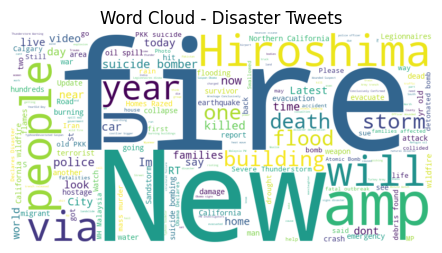

In [16]:
# Generate word cloud for disaster tweets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Disaster Tweets')


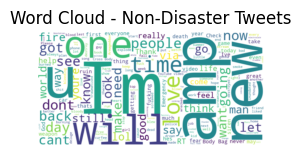

In [17]:
# Generate word cloud for non-disaster tweets
plt.subplot(1, 2, 2)
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_disaster_tweets))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Non-Disaster Tweets')
plt.show()


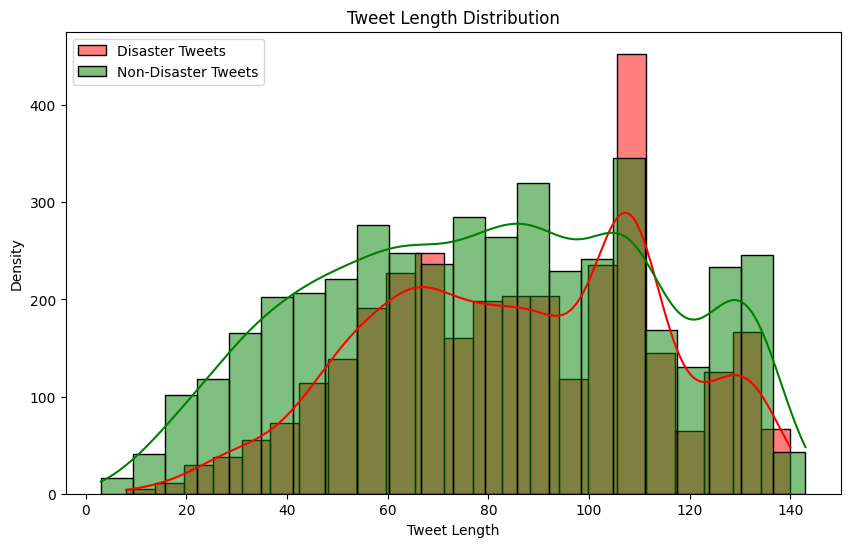

In [18]:
# Tweet Length Distribution
train_data['tweet_length'] = train_data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['target'] == 1]['tweet_length'], color='red', label='Disaster Tweets', kde=True)
sns.histplot(train_data[train_data['target'] == 0]['tweet_length'], color='green', label='Non-Disaster Tweets', kde=True)
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('Tweet Length Distribution')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Top 10 Disaster Keywords')

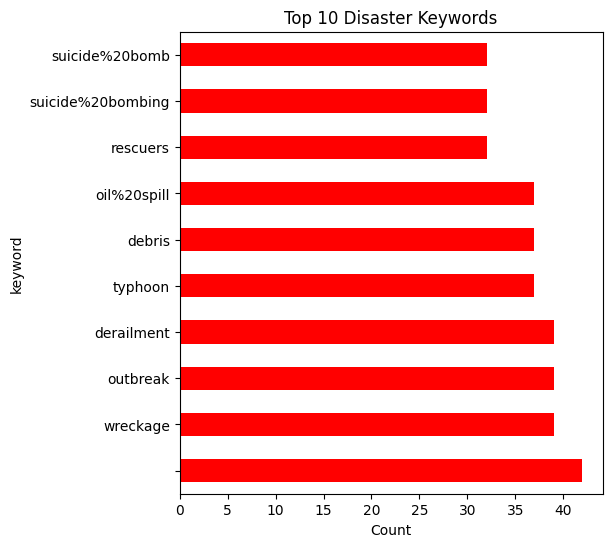

In [19]:
# Most Common Keywords in Disaster and Non-Disaster Tweets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
disaster_keywords = train_data[train_data['target'] == 1]['keyword'].value_counts().head(10)
disaster_keywords.plot(kind='barh', color='red')
plt.xlabel('Count')
plt.title('Top 10 Disaster Keywords')

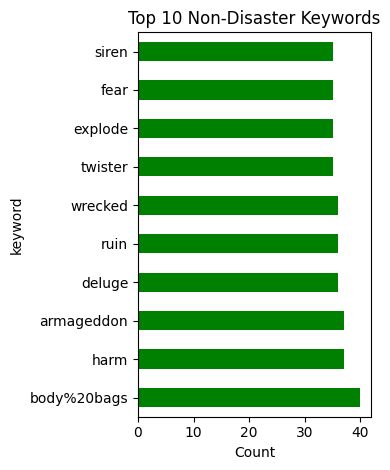

In [20]:
#Top 10 Non-Disaster Keywords
plt.subplot(1, 2, 2)
non_disaster_keywords = train_data[train_data['target'] == 0]['keyword'].value_counts().head(10)
non_disaster_keywords.plot(kind='barh', color='green')
plt.xlabel('Count')
plt.title('Top 10 Non-Disaster Keywords')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

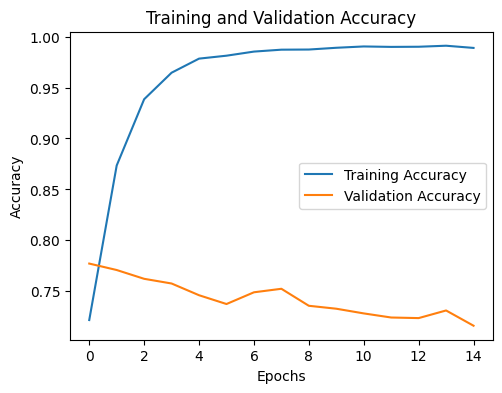

In [21]:
# Model Performance Visualization
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')


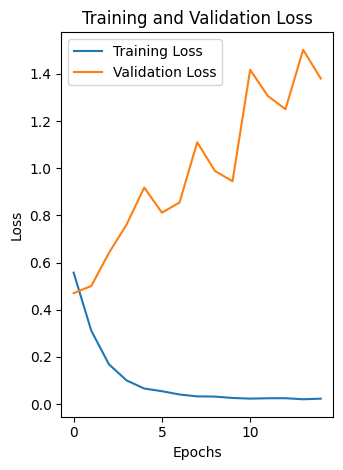

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()


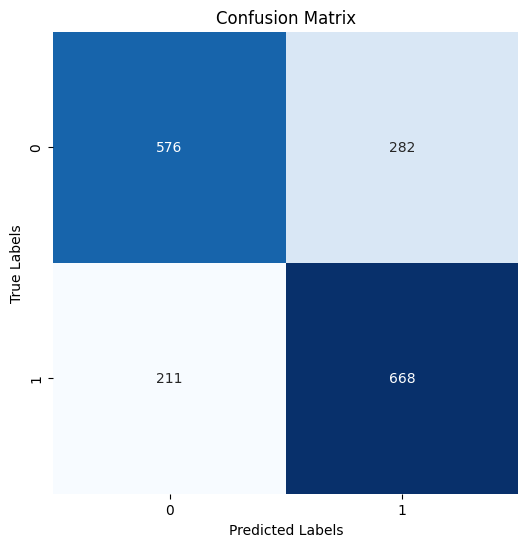

In [23]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Display some examples
for i in range(5):
    print("Example {}:".format(i + 1))
    print("Text: {}".format(test_data['text'][i]))
    print("Predicted Label: {}".format(predictions[i]))
    print("-" * 50)

Example 1:
Text: Just happened a terrible car crash
Predicted Label: 0
--------------------------------------------------
Example 2:
Text: Heard about earthquake is different cities stay safe everyone
Predicted Label: 0
--------------------------------------------------
Example 3:
Text: there is a forest fire at spot pond geese are fleeing across the street I cannot save them all
Predicted Label: 1
--------------------------------------------------
Example 4:
Text: Apocalypse lighting Spokane wildfires
Predicted Label: 1
--------------------------------------------------
Example 5:
Text: Typhoon Soudelor kills  in China and Taiwan
Predicted Label: 1
--------------------------------------------------


In [25]:
# Create submission file
submission = pd.DataFrame({'id': test_data['id'], 'target': predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)

## Conclusion
This project demonstrated the application of deep learning techniques for classifying disaster-related tweets. The developed LSTM model showed good performance in distinguishing between disaster and non-disaster tweets. The insights gained from advanced EDA further enhanced our understanding of the tweet data, contributing to the overall analysis.

Feel free to explore the provided!